<a href="https://colab.research.google.com/github/KalashKKT/Car_Price_Prediction/blob/main/car_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
#reading file
df = pd.read_csv("/content/drive/MyDrive/Car_price/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## EDA

In [3]:
#checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df['no_year']=2020-df['Year']

In [6]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [7]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [8]:
df=pd.get_dummies(df)

In [9]:
df.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,7,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,3,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,9,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,6,False,True,False,True,False,False,True


In [10]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
prediction = lr.predict(x_test)

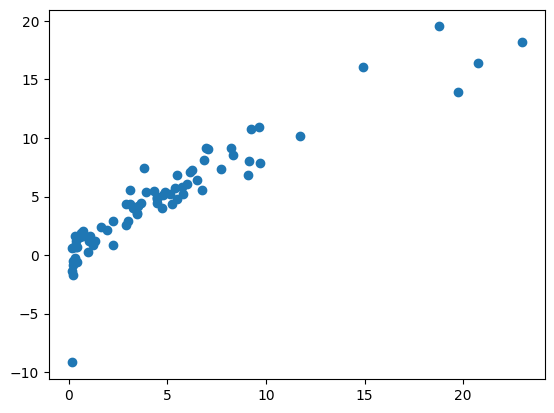

In [15]:
plt.scatter(y_test,prediction)

<ipython-input-16-0e5e279aab22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='Selling_Price', ylabel='Density'>

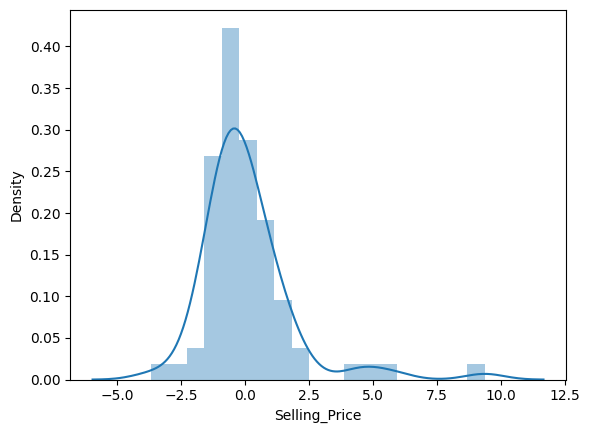

In [16]:
sns.distplot(y_test-prediction)


In [17]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.140996108785903
MSE:  3.2815963416575387
RMSE:  1.811517690130996
R squared:  0.8608525898499428


In [20]:
ridge=Ridge()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)

In [21]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1332339163458565
MSE:  3.273826643652638
RMSE:  1.8093718920256936
R squared:  0.8611820433361336


In [23]:
ridge=Lasso()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.3349151159008388
MSE:  4.4731368144517765
RMSE:  2.1149791522499166
R squared:  0.8103284687770422


In [27]:
r=Ridge()
parameters={'alpha':[1000,100,30,40,50]}
l=GridSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1194605545945524
MSE:  3.235117272776868
RMSE:  1.798643175501152
R squared:  0.8628234117876783


In [28]:
l.best_params_


{'alpha': 30}

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [31]:
r=RandomForestRegressor(n_estimators=100)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)
prediction = rf_random.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE:  0.5658177631578987
MSE:  1.069122511417107
RMSE:  1.0339838061677307
R squared:  0.95466668867577


In [32]:
r=RandomForestRegressor(n_estimators=100)

r.fit(x_train,y_train)
prediction = r.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  0.5132684210526324
MSE:  0.6772608684210535
RMSE:  0.8229586067482698
R squared:  0.971282544827202


In [33]:
import pickle
pickle.dump(r,open('model.pkl','wb'))